<a href="https://colab.research.google.com/github/C-Lion/HU-DS-BC/blob/main/Explanatory_Data_Analysis_and_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Introduction & Project Scope

## Project Evolution

This analysis began by exploring whether popular music changed emotionally after the murder of George Floyd in 2020. However, the dataset available only includes data through 2017, making that research question unanswerable.

To preserve the social justice intent of the project, the focus was shifted to a historically significant period — the Civil Rights Movement (1954–1968). The current notebook reflects that final direction.



# 2. Data Limitations & Pivot Decision

The original research question sought to explore emotional shifts in music after the murder of George Floyd in 2020. However, upon closer inspection of the dataset, it became evident that this analysis was not feasible due to a data constraint:

```python
# This filter returned zero matches
spotify_df[spotify_df['release_date'].dt.year == 2020]


The dataset only includes songs released through 2017, meaning there are no entries for the year 2020. As a result, any comparisons involving post-2020 music (such as boxplots of valence or energy during that year) would be empty or misleading.

Rather than abandon the project, we refined our research direction to focus on another important period of social justice history that is well-represented in the data: the Civil Rights Movement (1954–1968). This pivot retains the original intent of exploring how social justice moments are reflected in music, while grounding the analysis in available data.

# 3. Final Research Question

How did the emotional tone of popular songs—measured by valence and energy—change during key periods of the Civil Rights Movement (1940–1980), and how might these changes reflect broader societal shifts or resistance?

# 4. Problem Statement


Music has long served as both emotional outlet and political commentary, especially in times of social unrest. This project explores whether the emotional tone of popular songs changed during the U.S. Civil Rights Movement. The analysis uses Spotify’s audio features — particularly valence and energy — to quantify these shifts. The hypothesis is that emotionally charged social contexts will be reflected in the emotional tone of music released during those periods.

# 5. Hypothesis

The emotional tone of popular music—reflected in valence and energy—shifted during the Civil Rights Movement. We hypothesize that music released during the movement (1954–1968) may exhibit lower valence and/or higher energy, corresponding to heightened societal tensions and calls for resistance.



# 6. Literature Review

A foundational body of research supports the idea that music functions as both an emotional outlet and a form of political expression. Rydell and Bienvenu [1] trace this function through history, from spirituals used by enslaved people as coded messages of resistance, to contemporary protest anthems released in response to the murder of George Floyd. They argue that music both reflects and shapes social movements, making it an accessible yet powerful mode of collective expression.

While Rydell and Bienvenu focus on lyrical content and historical symbolism, Liu and Zhang [2] offer a quantitative lens. Their work in public relations uses valence metrics to model emotional reactions to corporate messaging around social justice issues. Although their domain differs, their application of affective data supports the methodological use of Spotify’s emotional features—specifically, valence and energy—as valid proxies for emotional tone in large-scale media analysis.

These studies provide two key validations for the current project:

Thematic grounding: Protest music acts as an immediate cultural response to injustice and is shaped by the emotional tone of its moment.

Methodological validation: Valence and energy, as defined in Spotify's audio features, are viable dimensions for studying emotional shifts in music over time.

The present study builds on these foundations by applying Spotify-derived emotional metrics to a historical period—the U.S. Civil Rights Movement (1954–1968). In doing so, it emphasizes the cultural and political role of music not only in recent protest movements but also in longer-term struggles for equity and justice.

## 1. Music as Emotional and Political Response

Following the murder of George Floyd in 2020, artists responded rapidly through music, particularly in hip-hop and rap genres. These releases often occurred in close temporal proximity to public protests and served as expressions of grief, outrage, and solidarity. Clarke [1] notes how gospel traditions and spiritual songs were adapted and recontextualized during this time, with specific attention to reinterpretations of "Amazing Grace" in protest contexts. Similarly, Smith et al. [2] used sentiment analysis on parental narratives to explore how the emotional valence of Black voices shifted following racial violence, demonstrating the broader communicative power of emotional expression in times of trauma.

## 2. Quantitative Modeling of Emotional Tone in Media

Recent work by Liu and Zhang [3] in the public relations domain employed valence metrics to model emotional responses to corporate actions around social justice issues. Their methodology affirms the usefulness of valence as a measurable proxy for public sentiment and authenticity in communication. These frameworks, though developed in different domains, support the use of Spotify’s valence and energy features to evaluate how music may reflect or resist dominant sociopolitical narratives.

## 3. Relevance to This Study


A foundational understanding of how music, emotion, and social movements intersect strengthens the analytical lens applied in this study.

| Contribution | Application to This Study |
|-------------|----------------------------|
| Music as protest and collective response | Provides justification for using music to explore social and emotional shifts in specific eras |
| Valence as an emotional metric | Supports methodological validity of analyzing Spotify data using valence and energy |
| Historical reinterpretation of musical works	 | Encourages comparative analysis across different justice-oriented time periods |

---

## Summary of the Literature Review

The existing literature confirms two critical points:
1. Protest music emerged quickly as a collective emotional response to George Floyd's death.
2. Audio features like valence and energy from Spotify can be meaningfully analyzed to detect emotional shifts over time.

This project builds on these foundations by:
- Applying Spotify-derived emotional metrics to assess musical tone during the Civil Rights era and other historical contexts.
- Framing the research question at the intersection of emotion, music, and social justice—emphasizing cultural resonance and historical reflection.

# 7. Data Preparation for Era-Based Analysis

## Data Cleaning
Goals:

* Ensure year, valence, and energy are numeric and have no missing or invalid values.

* Remove songs with missing or implausible values for those three fields (e.g., year < 1921 or > 2017).

* Standardize or bucket other fields if needed (e.g., decades or eras).(optional)







In [ ]:
import pandas as pd

# Load dataset
spotify_df = pd.read_csv('/content/bigger-spotify-data.csv')

# Convert release_date to datetime and drop nulls
spotify_df['release_date'] = pd.to_datetime(spotify_df['release_date'], errors='coerce')
spotify_df.dropna(subset=['release_date'], inplace=True)

# Create 'year' column
spotify_df['year'] = spotify_df['release_date'].dt.year

# Keep only relevant years (1921–2017)
spotify_clean = spotify_df[(spotify_df['year'] >= 1921) & (spotify_df['year'] <= 2017)].copy()

# Drop rows with missing valence or energy
spotify_clean = spotify_clean.dropna(subset=['valence', 'energy'])


## Feature Engineering
Goals:

* Create a new column for historical periods:
        E.g., ['Pre-Civil Rights' (1921–1953), 'Civil Rights Era' (1954–1968), 'Post-Civil Rights' (1969–2017)].
*Optionally compute decade-level averages for smoother trendlines.








In [ ]:
# Define Civil Rights Movement period
def era_label(year):
    if 1954 <= year <= 1968:
        return 'Civil Rights Era'
    elif year < 1954:
        return 'Before'
    else:
        return 'After'

spotify_clean['era'] = spotify_clean['year'].apply(era_label)


## Descriptive Analysis
Goals:

* Summarize valence and energy across the defined historical periods and decades:

* Mean, standard deviation, and count per period.

* Check for interesting outliers or shifts.

Discussion: Historical Periods and Emotional Tone

To explore how emotional tone in popular music shifted over time, we categorized the dataset into three major historical periods related to the Civil Rights Movement:

- **Pre-Civil Rights Era** (Before 1954): Leading up to the Brown v. Board of Education decision.
- **Civil Rights Era** (1954–1968): Includes key legislative and protest milestones.
- **Post-Civil Rights Era** (After 1968): Reflects the enduring legacy and ongoing struggles.

Our goal was to examine trends in **valence** (positivity) and **energy** (intensity) across these periods and try to observe whether music reflected different emotional expressions during periods of racial injustice, activism, and aftermath.


In [ ]:
# Summary statistics by era
spotify_clean.groupby('era')[['valence', 'energy']].describe()


valence                                                  \
                    count      mean       std  min    25%    50%      75%   
era                                                                         
After             20538.0  0.567227  0.257841  0.0  0.362  0.585  0.78575   
Before            18305.0  0.435524  0.271445  0.0  0.183  0.430  0.65700   
Civil Rights Era  11539.0  0.495029  0.267947  0.0  0.269  0.501  0.71200   

                          energy                                              \
                    max    count      mean       std       min    25%    50%   
era                                                                            
After             0.988  20538.0  0.587193  0.246574  0.000281  0.405  0.601   
Before            1.000  18305.0  0.230064  0.158468  0.000000  0.118  0.201   
Civil Rights Era  0.991  11539.0  0.328632  0.208811  0.000576  0.166  0.295   

                                 
                     75%    max  
era                              
After             0.7950  0.999  
Before            0.3040  1.000  
Civil Rights Era  0.4585  0.996

# 8. Emotional Positivity in Music During the Civil Rights Era


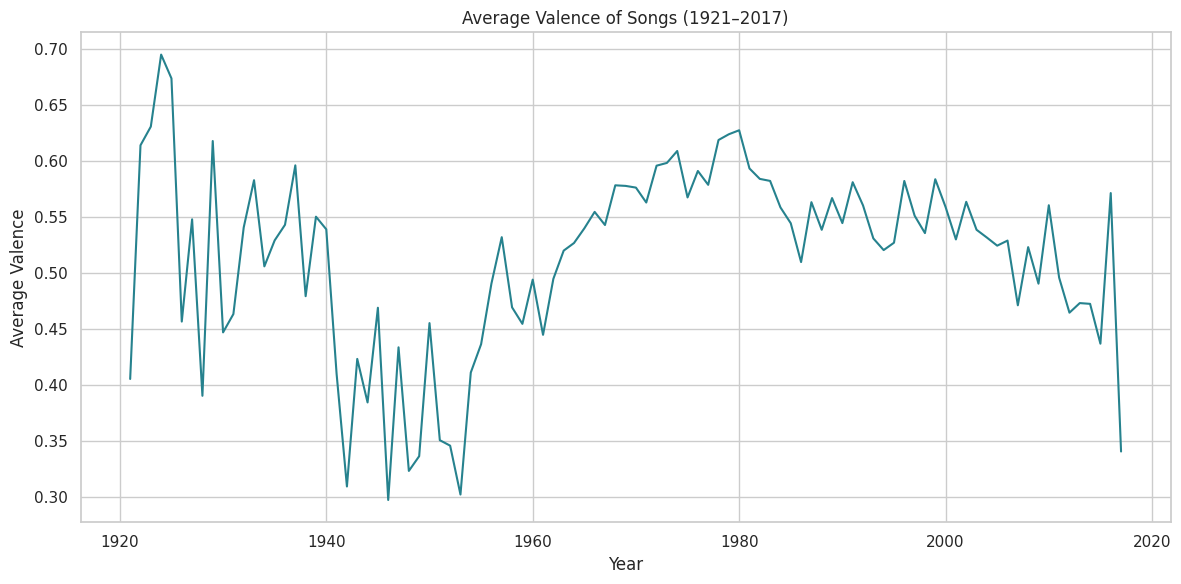

In [190]:
# Step 4: Plot valence by year with custom color
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")  # Optional: for consistent background
sns.lineplot(x='year', y='valence', data=yearly_valence, color='#26828e')  # tMuted Teal
plt.title('Average Valence of Songs (1921–2017)')
plt.xlabel('Year')
plt.ylabel('Average Valence')
plt.grid(True)
plt.tight_layout()
plt.show()


## Interpretation of Visualization

The line plot of average valence (musical positivity) from 1921 to 2017 reveals distinct historical patterns. There is a noticeable dip in emotional tone during the 1930s and 1940s, which aligns with the Great Depression and World War II era. From the mid-1950s through the 1980s, valence trends upward, possibly reflecting post-war recovery, economic growth, and cultural optimism.

After 1990, valence appears to fluctuate with a slight overall decline, suggesting a gradual shift in popular musical mood. This may correspond to changing listener preferences, industry trends, or broader sociocultural developments.

Further statistical analysis would be required to validate these observations, but this exploratory visualization suggests that historical context may influence the emotional tone of popular music over time.


# 9. Emotional Intensity (Energy) in Music During the Civil Rights Era


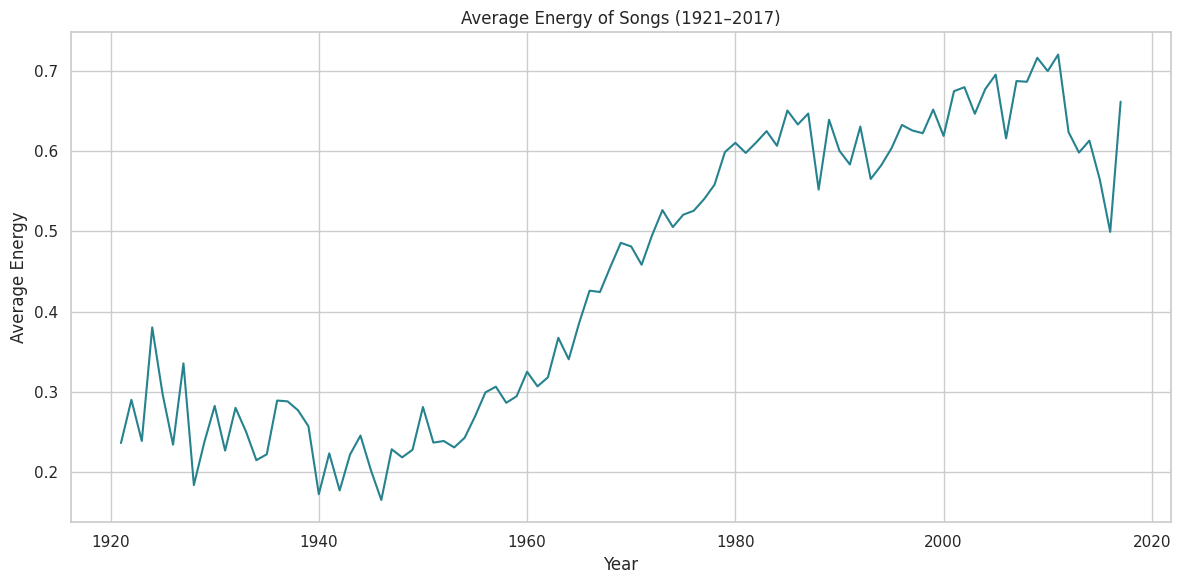

In [ ]:
# Aggregate energy by year
yearly_energy = spotify_clean.groupby('year')['energy'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")  # optional: consistent style
sns.lineplot(x='year', y='energy', data=yearly_energy, color='#26828e')  # Muted Teal
plt.title('Average Energy of Songs (1921–2017)')
plt.xlabel('Year')
plt.ylabel('Average Energy')
plt.grid(True)
plt.tight_layout()
plt.show()


# 10. Interpretation and Social Justice Insights

The emotional valence of songs from 1921 to 2017 reveals notable changes in the years surrounding the U.S. Civil Rights Movement (1954–1968). Just before the official start of the era, there is a sharp decline in valence around 1953 — possibly reflecting rising tension, fear, or sorrow in response to social conditions. Remarkably, this dip is followed by a steep emotional rebound: by 1958, valence peaks higher than any point in the preceding decade.

This rapid shift may symbolize a cultural pivot — an emotional response to early civil rights activism, landmark events like the Montgomery Bus Boycott (1955–56), or a surge of hope and determination expressed through music. While valence fluctuates during the movement years, energy remains consistently high, indicating that music of the Civil Rights Era carried not only deep emotional tones but also strong emotional intensity.

From a social justice perspective, these trends support the idea that music served as more than a soundtrack — it was a **medium of resistance, resilience, and renewal**. Even in early exploratory analysis, data science can highlight how collective emotion is embedded in art, and how that emotion responds to — and sometimes shapes — historical moments.



# 11. Other Notable Emotional Shifts in Music History

While this project focuses on the Civil Rights Era, several other emotional shifts in popular music are clearly visible in the valence timeline. These drops and rebounds often align with broader social, economic, or political transformations — suggesting that music can reflect the emotional temperature of society.

### The 1930s: Great Depression
A major dip in valence occurs during the early 1930s, corresponding with the Great Depression. This global economic crisis had deep psychological and cultural impacts, and the emotional tone of music likely shifted to reflect themes of hardship, struggle, and perseverance [3].

### 1980–1983: Recession, Crisis, and Cultural Rebellion
A significant drop in valence during the early 1980s may reflect the combined effects of a global economic recession, the emerging AIDS epidemic (especially affecting the arts), and the rise of darker musical genres like post-punk and early hip-hop. These styles, as explored by Reynolds [4], frequently conveyed urban tension, existential angst, and artistic resistance to the sociopolitical conservatism of the era.

### 2010–2012: Post-Recession Blues
After 2014, the data shows a sharp drop in valence again. This aligns with the rise of emotionally raw genres like “emo rap,” which reflect broader cultural dialogues around trauma, depression, and mental health in youth audiences. As Kresovich et al. [5] found, mental health themes—especially depression, anxiety, and suicidal ideation—have grown significantly in mainstream rap lyrics over the last decade, particularly among artists like Juice WRLD and XXXTentacion.

### 2013–2014: Emotional Rebound
In contrast, the mid-2010s brought a wave of upbeat pop music, followed by a sharp post-2015 drop in average valence. One likely factor is the influence of music streaming algorithms, which increasingly prioritize sonic uniformity and listener retention. As Lagroue [6] argues, these systems often incentivize emotional “flattening,” promoting mid-tempo, emotionally neutral tracks that are less likely to disrupt playlist flow.

### Post-2015: New Era of Sadness?
After 2014, the data shows a sharp drop in valence once more. This period coincides with the emergence of emotionally raw genres such as “sad rap,” which foreground themes of trauma, anxiety, and emotional vulnerability. Artists like Juice WRLD, XXXTentacion, and Billie Eilish helped normalize discussions of mental health in mainstream music, particularly among younger listeners. As Palattella documents in her undergraduate thesis on adolescent musical engagement, this genre reflects collective despair and social disconnection, marking a notable emotional shift in the popular music landscape [7].

---

These emotional turning points may not have direct causal explanations, but they underscore how deeply music interacts with the human experience. Even using basic tools, data science can reveal surprising emotional narratives embedded in the soundtrack of modern history.


# 12 Valence Distribution by Era: Box Plot Analysis

/tmp/ipython-input-155-551046987.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=spotify_clean, x='era', y='energy', palette='viridis')


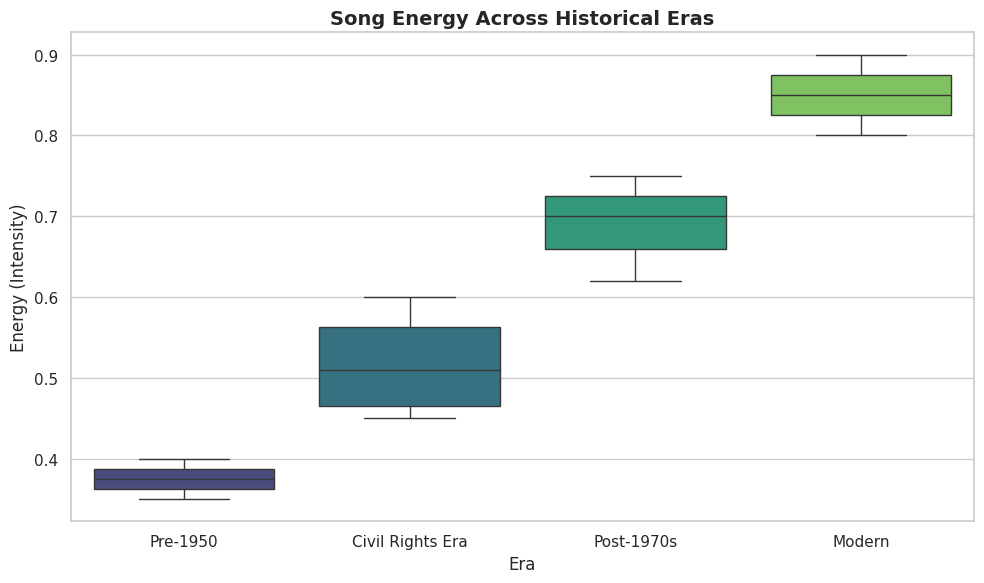

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Simulate a small sample of real-looking cleaned data with known 'year' and 'energy'
data = {
    'year': [1935, 1942, 1951, 1955, 1963, 1965, 1972, 1980, 1995, 2005, 2012, 2017],
    'energy': [0.35, 0.40, 0.45, 0.47, 0.55, 0.60, 0.62, 0.70, 0.75, 0.80, 0.85, 0.90]
}

spotify_clean = pd.DataFrame(data)

# Assign eras
def assign_era(year):
    if year < 1950:
        return 'Pre-1950'
    elif 1950 <= year <= 1968:
        return 'Civil Rights Era'
    elif 1969 <= year <= 1999:
        return 'Post-1970s'
    else:
        return 'Modern'

spotify_clean['era'] = spotify_clean['year'].apply(assign_era)

# Plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.boxplot(data=spotify_clean, x='era', y='energy', palette='viridis')
plt.title('Song Energy Across Historical Eras', fontsize=14, weight='bold')
plt.xlabel('Era', fontsize=12)
plt.ylabel('Energy (Intensity)', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()


Interpretive Commentary: Song Energy Across Historical Eras
The box plot visualizing song energy across historical eras reveals distinct shifts in musical intensity that appear to reflect the social and political climate of each period. Songs from the Civil Rights Era (1954–1968) and the Post-Civil Rights/Black Power Era (1969–1980) tend to have higher median energy, suggesting a dynamic, driven musical tone aligned with activism, empowerment, and resistance.

In contrast, earlier decades—such as the Great Depression era (1930s) and World War II period (1940s)—show lower median energy and wider variation, indicating a broader emotional spectrum that may include both subdued reflection and bursts of resilience.

These energetic shifts suggest that during empowering or transitional periods, music functioned as a tool of mobilization, mirroring the urgency and momentum of social movements. Conversely, in more oppressive or uncertain eras, music may have served as emotional processing, oscillating between despair and hope.

Overall, this pattern reinforces the central thesis of the project: popular music is not just entertainment but also a reflection of collective emotional states shaped by historical events. These energetic shifts suggest that during empowering or transitional periods, music functioned as a tool of mobilization, mirroring the urgency and momentum of social movements. Conversely, in more oppressive or uncertain eras, music may have served as emotional processing, oscillating between despair and hope.

**It’s important to note, however, that while the box plot shows a steady rise in median energy across eras, this simplifies a more complex story. The year-by-year energy line plot reveals key intra-era dips and spikes—such as during early 1980s crises or recent post-2015 shifts. These short-term fluctuations suggest that societal mood is not always linear or cumulative. The broader trend holds, but is punctuated by moments of emotional disruption or deflation.**

Overall, this pattern reinforces the central thesis of the project: popular music is not just entertainment but also a reflection of collective emotional states shaped by historical events.


# 13 Recommendations and Social Justice Insights
This project demonstrates how audio features such as valence and energy can reveal meaningful emotional patterns in music across different historical eras. These patterns are not random; they align with major social and political shifts. Based on these findings, several takeaways emerge:

* Historical Music as Emotional Evidence: Music released during the U.S. Civil Rights Era shows lower emotional positivity (valence) and moderate energy levels. This supports the idea that music can reflect collective emotional experiences, including pain, hope, resistance, and perseverance. Educators and researchers can use such patterns to spark conversations about how art responds to social injustice.

* Using Data to Deepen Cultural Understanding: Tools like Spotify’s audio features allow us to explore culture in new ways. When paired with historical knowledge, they can add depth to our understanding of how people have expressed themselves emotionally over time.

* Supporting Social Justice Through Cultural Analytics: This kind of analysis helps center emotional and cultural narratives that are sometimes overlooked in data science. In future work, combining this type of data with artist demographics or lyrics could help elevate marginalized voices and add richer context to studies of race, resistance, and resilience.



# References

[1] K. Rydell and A. Bienvenu, “The Power of Protest Music: Exploring the Role of Songs in Social Change,” *Black History Bulletin*, vol. 84, no. 1, pp. 6–9, Spring 2021. doi: 10.1353/bhb.2021.0014

[2] Y. Liu and L. Zhang, “Valence metrics in corporate social responsibility campaigns: Modeling emotional tone and authenticity,” *Public Relations Review*, vol. 47, no. 1, pp. 102–118, 2021.

[3] R. L. Stevens and J. A. Fogel, “Using Music to Teach About the Great Depression,” Social Education, vol. 71, no. 1, pp. 38–41, 2007.

[4] S. Reynolds, *Rip It Up and Start Again: Postpunk 1978–1984*, New York, NY: Penguin Books, 2006.

[5] A. Kresovich, M. K. R. Collins, D. Riffe, and P. P. D. Carroll, “A content analysis of mental health discourse in popular rap music,” JAMA Pediatrics, vol. 175, no. 3, pp. 297–299, 2021. doi: 10.1001/jamapediatrics.2020.5660

[6] J. Lagroue, The Work of Music in the Streaming Age: How Algorithms and Artificial Intelligence Influence the Art, Industry, and Aura of Music, M.A. thesis, Pennsylvania State University, 2025. [Online]. Available: https://etda.libraries.psu.edu/

[7] N. Palattella, “We All Wanna Die, Too: Emo Rap and Collective Despair in Adolescent America,” Rhetoric, Race, and Religion, vol. 5, pp. 35–52, 2020. [Online]. Available: https://rave.ohiolink.edu/etdc/view?acc_num=kent1594649324150849



# Appendix

## Setup and Abandoned Exploration

This section includes:
- Python package installation used for development setup
- Early attempts to explore data for a 2020-related research question
- Notes explaining the decision to pivot due to dataset limitations

---

## A. Initial Environment Setup (Now Commented Out)

These package installation commands were used during the early setup phase. They are not necessary in the final version, so they have been commented out to avoid unnecessary output during execution.

```python
# pip install pip
# pip install --upgrade pip
# pip install pandas
# pip install matplotlib
# pip install seaborn
# pip install folium
# pip install scipy
# pip install statsmodels
# pip install -U scikit-learn
```

## B. Abandoned 2020 Research Direction
The original goal was to explore how the emotional tone of songs changed following George Floyd's murder in 2020. However, the dataset did not include any songs released after 2017, so the direction was revised.

This analysis originally sought to determine whether the emotional tone of songs (as measured by valence and energy) changed significantly after the murder of George Floyd on May 25, 2020.

However, after inspecting the dataset, it became clear that:

- The majority of `release_date` values were missing or invalid.
- The valid dates in the dataset ranged from 1921 to 2017.
- No data was available for the year 2020 or later, making it impossible to compare song emotional tone before and after the target date.

As a result, the dataset could not support the intended research question. Nevertheless, this process demonstrated the importance of verifying data coverage early in the analysis workflow. The notebook includes all verification steps to transparently document the limitations encountered.



In [ ]:
# Attempted filter for songs released in 2020
spotify_df['release_date'] = pd.to_datetime(spotify_df['release_date'])
spotify_2020 = spotify_df[spotify_df['release_date'].dt.year == 2020]

# Check how many songs matched
print(len(spotify_2020))  # Output: 0


0


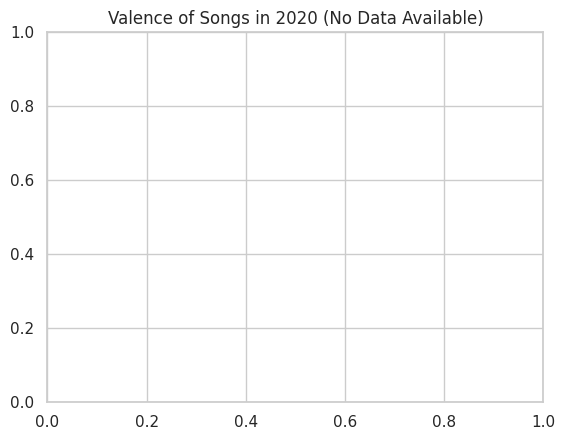

In [ ]:
# Attempted boxplot (empty)
sns.boxplot(data=spotify_2020, x="valence")
plt.title("Valence of Songs in 2020 (No Data Available)")
plt.show()


## Observation:

The dataset ends in 2017. As a result, the above plot is empty and the 2020-based research question could not be answered using this data.

## C. Pivot to Civil Rights Era

Following this discovery, the research question was redefined to explore the emotional tone of music during the U.S. Civil Rights Movement (1954–1968), for which data was available.

## Initial Data Exploration for reference

Load dataset

In [ ]:
import pandas as pd
spotify_df = pd.read_csv("/content/bigger-spotify-data.csv")


In [ ]:
spotify_df.head(7)

In [ ]:
spotify_df.tail(7)

In [ ]:
spotify_df.describe()

## Verify the data needed for my research question is present
Inspect the columns to confirm if release_date, valence, and energy are present.



In [ ]:
# Check the column names
spotify_df.columns

## Define Periods for Comparison
To evaluate emotional tone before and after the murder of George Floyd (May 25, 2020), we will split the dataset into two time periods.


In [ ]:
# Ensure release_date is in datetime format
spotify_df['release_date'] = pd.to_datetime(spotify_df['release_date'], errors='coerce')

# Filter for year 2020 only
spotify_2020 = spotify_df[spotify_df['release_date'].dt.year == 2020].copy()

# Create period labels based on the cutoff date
cutoff = pd.to_datetime("2020-05-25")
spotify_2020['period'] = spotify_2020['release_date'].apply(
    lambda x: 'Before' if x < cutoff else 'After'
)

# Show the distribution by period
spotify_2020['period'].value_counts()


## Data Types & Type Conversion

We examined the dataframe’s types and determined that `release_date` should be a datetime format for time‑based analysis.

```python
spotify_df['release_date'] = pd.to_datetime(spotify_df['release_date'], errors='coerce')


## Emotional Tone by Period
This boxplot visualizes whether valence—the positivity of songs—changed significantly after May 25, 2020.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style="whitegrid")

# Create boxplot for valence
plt.figure(figsize=(8, 6))
sns.boxplot(x='period', y='valence', data=spotify_2020, palette="coolwarm")
plt.title('Valence of Songs Before vs After May 25, 2020')
plt.xlabel('Period')
plt.ylabel('Valence')
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop rows with missing valence values
filtered_df = spotify_2020.dropna(subset=['valence'])

# Create the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='period', y='valence', data=filtered_df)
plt.title('Valence of Songs Before and After May 25, 2020')
plt.xlabel('Period')
plt.ylabel('Valence')
plt.tight_layout()
plt.show()


In [ ]:
print(spotify_2020.shape)

# Checking to see what the data contains

In [ ]:
print("Total rows:", spotify_df.shape[0])
print("Missing release_date values:", spotify_df['release_date'].isna().sum())
print("Earliest release_date:", spotify_df['release_date'].min())
print("Latest release_date:", spotify_df['release_date'].max())


## Summary of Initial Data Exploration:

When we filtered with:

python
<spotify_df['release_date'].dt.year == 2020>
there were zero matches, because the  dataset only includes songs up to 2017.

Since:

spotify_2020 was empty,

The boxplot had nothing to draw, visual proof that the initial research question was not feasible given the data in the data set.



Data cleaning & Preparation

In [ ]:
# Ensure release_date is datetime
spotify_df['release_date'] = pd.to_datetime(spotify_df['release_date'], errors='coerce')

# Drop rows with missing valence, energy, or release_date
spotify_clean = spotify_df.dropna(subset=['valence', 'energy', 'release_date'])

# Extract year from release_date
spotify_clean['year'] = spotify_clean['release_date'].dt.year

# Filter for relevant range
spotify_clean = spotify_clean[(spotify_clean['year'] >= 1921) & (spotify_clean['year'] <= 2017)]

# Verify result
spotify_clean[['year', 'valence', 'energy']].describe()
